# Week 2 Homework

## Dataset
In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 03:43:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   955KB/s    in 1.5s    

2022-09-19 03:43:59 (955 KB/s) - ‘housing.csv’ saved [1423529/1423529]



The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

## EDA
- Load the data.
- Look at the `median_house_value` variable. Does it have a long tail?

### Features
For the rest of the homework, you'll need to use only these columns:

- `'latitude'`,
- `'longitude'`,
- `'housing_median_age'`,
- `'total_rooms'`,
- `'total_bedrooms'`,
- `'population'`,
- `'households'`,
- `'median_income'`,
- `'median_house_value'`


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
columns = ["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms", "population",
          "households", "median_income", "median_house_value"]
df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

### Question 1
Find a feature with missing values. How many missing values does it have?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

- **total_bedrooms**: Has 207 missing values

### Question 2
What's the median (50% percentile) for variable 'population'?

In [9]:
df["population"].median()

1166.0

### Split the data
- Shuffle the initial dataset, use seed `42`.
- Split your data in `train/val/test sets`, with `60%/20%/20%` distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [12]:
np.random.seed(42)
n = len(df)
print(n)
idx = np.arange(n)
print(idx[:10])

20640
[0 1 2 3 4 5 6 7 8 9]


In [13]:
np.random.shuffle(idx)
print(idx[:10])

[20046  3024 15663 20484  9814 13311  7113  7668 18246  5723]


In [15]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(12384, 4128, 4128)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [19]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

y_train[:10]

array([10.77270764, 10.7320612 , 13.12236738, 12.29500343, 12.53537999,
       11.97477721, 12.19703695, 11.96718709, 12.73670384, 13.00942086])

In [20]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [21]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

df_train.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313


### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?

#### Filling missing values in `total_bedrooms` column with 0

In [25]:
def fill_column_missing_values(df, column, value):
    df_new = df.copy()
    df_new[column] = df_new[column].fillna(value)
    
    return df_new
df_train2 = fill_column_missing_values(df_train, "total_bedrooms", 0)

In [26]:
df_train2.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,0.0,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,0.0,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,0.0,1063.0,428.0,3.7250


In [27]:
df_val2 = fill_column_missing_values(df_val, "total_bedrooms", 0)
df_val2.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531
1,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350
2,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830
3,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763
4,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434


#### Training a linear regression model

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [31]:
X_train = df_train2.values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [32]:
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

<AxesSubplot:ylabel='Count'>

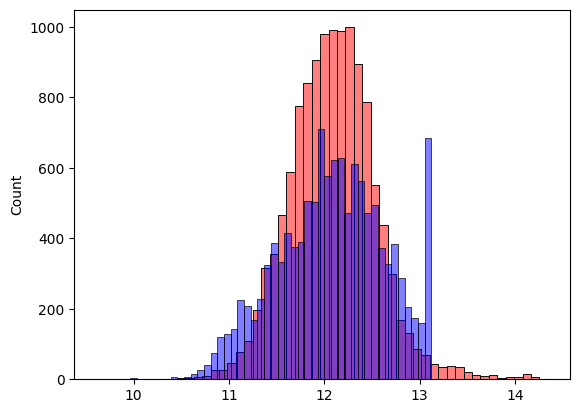

In [34]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [35]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [37]:
rmse(y_train, y_pred).round(2)

0.34

#### Filling missing values in total_bedrooms column with mean value

In [39]:
df_train2 = fill_column_missing_values(df_train, "total_bedrooms", df_train2["total_bedrooms"].mean())
df_train2.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,533.33128,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,533.33128,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,533.33128,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,533.33128,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,533.33128,1063.0,428.0,3.7250


In [40]:
X_train = df_train2.values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [43]:
y_pred

array([11.3734243 , 11.97235337, 12.49869274, ..., 11.53551218,
       11.92115942, 12.5450068 ])

<AxesSubplot:ylabel='Count'>

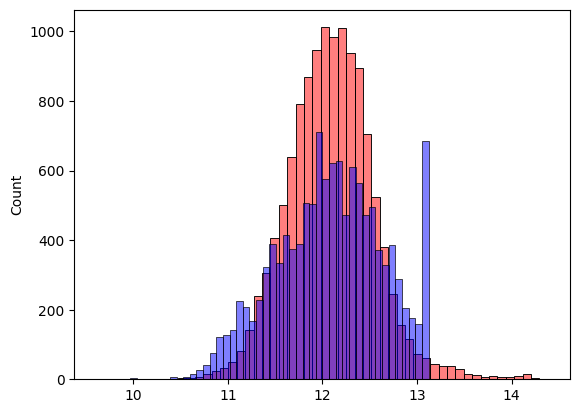

In [41]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [42]:
rmse(y_train, y_pred).round(2)

0.34

Both options filling missing values with either 0 or mean value are equally good

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?
If there are multiple options, select the smallest `r`.

In [44]:
df_train2 = fill_column_missing_values(df_train, "total_bedrooms", 0)
df_val2 = fill_column_missing_values(df_val, "total_bedrooms", 0)

In [45]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Model Tuning

In [53]:
r_scores = []
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = df_train2.values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val2.values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    r_scores.append((r, score))
    
    print(r, w0, score)

0.0 -11.686975241808469 0.33
1e-05 -11.686814584456062 0.33
0.0001 -11.685368865259061 0.33
0.001 -11.670931318158033 0.33
0.1 -10.274500281964693 0.33
1 -4.92048089781671 0.33
10 -0.7899311832023754 0.34


In [54]:
r_scores = sorted(r_scores, key = lambda x: x[1])
r_scores

[(0.0, 0.33),
 (1e-05, 0.33),
 (0.0001, 0.33),
 (0.001, 0.33),
 (0.1, 0.33),
 (1, 0.33),
 (10, 0.34)]

In [56]:
smallest_r = r_scores[0][0]
smallest_r

0.0

### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the `train/validation/test` split with `60%/20%/20%` distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [71]:
def prepare_train_val_test_splits(df, n_train, n_val, n_test, idx):
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    return df_train, df_val, df_test

In [67]:
def prepare_X_y(df_train, df_val, df_test):
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]

    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values
    
    return (X_train, X_val, X_test, y_train, y_val, y_test)

In [88]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [68]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [94]:
for seed in seed_values:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # train/validation/test split with 60%/20%/20% distribution.
    df_train, df_val, df_test = prepare_train_val_test_splits(df, n_train, n_val, n_test, idx)
    
    # Fill the missing values with 0
    df_train = fill_column_missing_values(df_train, "total_bedrooms", 0)
    df_val = fill_column_missing_values(df_val, "total_bedrooms", 0)
    df_test = fill_column_missing_values(df_test, "total_bedrooms", 0)
    
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_X_y(df_train, df_val, df_test)
    
    # train a model without regularization.
    w0, w = train_linear_regression(X_train, y_train)
    
    # evaluate the model on the validation dataset and collect the RMSE scores
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

In [95]:
rmse_scores

[0.33884304805303267,
 0.33623872559566276,
 0.3320912318833194,
 0.34051536090377893,
 0.33890240665742954,
 0.34348667257187443,
 0.34519809530991635,
 0.3395989927407549,
 0.34662308731992736,
 0.3365926124190448]

In [98]:
rmse_scores_std = round(np.std(rmse_scores), 3)
rmse_scores_std

0.004

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

In [104]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

# train/validation/test split with 60%/20%/20% distribution.
df_train, df_val, df_test = prepare_train_val_test_splits(df, n_train, n_val, n_test, idx)

# Fill the missing values with 0
df_train = fill_column_missing_values(df_train, "total_bedrooms", 0)
df_val = fill_column_missing_values(df_val, "total_bedrooms", 0)
df_test = fill_column_missing_values(df_test, "total_bedrooms", 0)

X_train, X_val, X_test, y_train, y_val, y_test = prepare_X_y(df_train, df_val, df_test)

df_full_train = pd.concat([df_train, df_val])
X_full_train = np.concatenate([X_train, X_val])
y_full_train = np.concatenate([y_train, y_val])

In [107]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 2)
score

0.35